<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2D-Plots-using-Two-different-features-(Linear-Kernel)" data-toc-modified-id="2D-Plots-using-Two-different-features-(Linear-Kernel)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2D Plots using Two different features (Linear Kernel)</a></span></li><li><span><a href="#2D-Plots-using-Two-different-features-(Non-Linear-Kernels)" data-toc-modified-id="2D-Plots-using-Two-different-features-(Non-Linear-Kernels)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2D Plots using Two different features (Non-Linear Kernels)</a></span></li><li><span><a href="#3D-Plots-using-3-different-features" data-toc-modified-id="3D-Plots-using-3-different-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D Plots using 3 different features</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></div>

# SVM Visualization

Tutorial Guide: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from warnings import simplefilter
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.feature_selection import SelectPercentile, f_classif
simplefilter(action='ignore', category=FutureWarning)

## 2D Plots using Two different features (Linear Kernel)

In [166]:
# Creating a linearly separable dataset using Gaussian Distributions.
# The first half of the number in Y is 0 and the other half 1.
# Therefore I made the first half of the two features quite different from
# the second half of the features (setting the value of the means quite 
# similar) so that make quite simple the classification between the 
# classes (the data is linearly separable).
dataset_len = 100
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(1,1,dlen))
X_12 = pd.Series(np.random.normal(10,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(2,1,dlen))
X_22 = pd.Series(np.random.normal(9,2,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, Y], axis=1)
df.columns = ['X1', 'X2', 'Y']
len(df)

100

Text(0.5, 1.0, 'Distribution Plot')

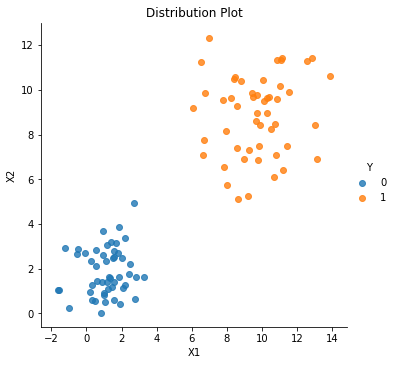

In [48]:
sns.lmplot('X1', 'X2', data=df, hue='Y', fit_reg=False)
plt.title('Distribution Plot')

In [167]:
X = df.drop(['Y'], axis=1)
Y = df.Y

In [50]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
model.support_vectors_

array([[2.70973764, 4.95303621],
       [6.62371188, 7.10618761]])

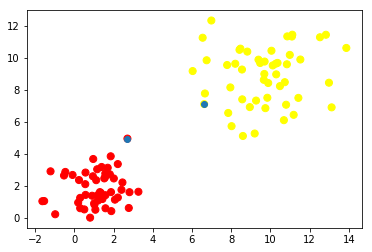

In [52]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

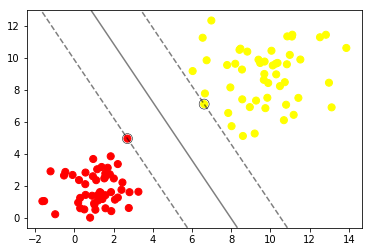

In [62]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 20)
yy = np.linspace(ylim[0], ylim[1], 20)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=0.5, facecolors='none', edgecolors='k')
plt.show()

## 2D Plots using Two different features (Non-Linear Kernels)

In [269]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

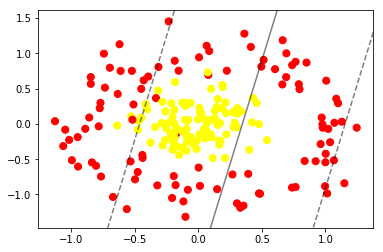

In [275]:
X, Y = make_circles(200, factor=0.2, noise=0.2)

clf = SVC(kernel='linear').fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Text(0.5, 0, 'r')

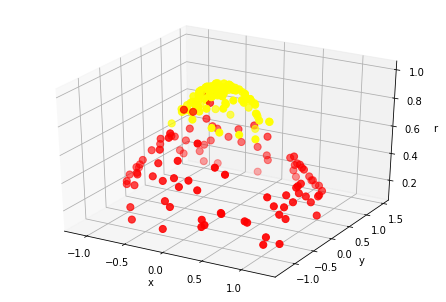

In [276]:
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [278]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

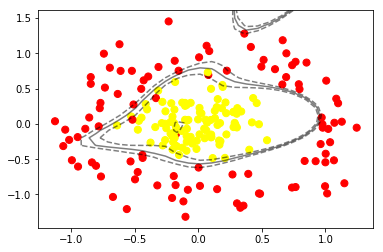

In [280]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## 3D Plots using 3 different features

In [169]:
dataset_len = 500
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(1,1,dlen))
X_12 = pd.Series(np.random.normal(10,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(2,1,dlen))
X_22 = pd.Series(np.random.normal(9,2,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
X_31 = pd.Series(np.random.normal(3,2,dlen))
X_32 = pd.Series(np.random.normal(9,2,dlen))
X_3 = pd.concat([X_21, X_22]).reset_index(drop=True)
Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, X_3, Y], axis=1)
df.columns = ['X1', 'X2', 'X3', 'Y']
len(df)
df.head()

,X1,X2,X3,Y
0,2.340943,3.035543,3.035543,0
1,0.683383,1.620545,1.620545,0
2,2.222301,1.928807,1.928807,0
3,-0.173681,4.073423,4.073423,0
4,-0.487281,2.160146,2.160146,0


In [170]:
X = df.drop(['Y'], axis=1)
Y = df.Y

[[1.16428532 0.43904737 0.43904737]]


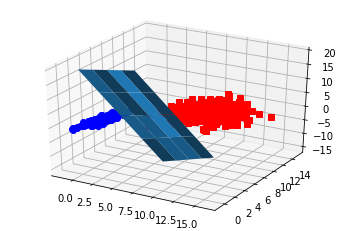

In [187]:
# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.
print(svc.coef_)

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-0,10,5)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X.iloc[Y.values==0,0], X.iloc[Y.values==0,1], X.iloc[Y.values==0,0],'ob')
ax.plot3D(X.iloc[Y.values==1,0], X.iloc[Y.values==1,1], X.iloc[Y.values==0,0],'sr')
plt.show()

In [186]:
# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

# Defining decision boundary dimensions
tmp = np.linspace(-0, 10, 5)
x,y = np.meshgrid(tmp,tmp)

# Plotting
fig = go.FigureWidget()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale='Greys', showscale=False)
fig.add_scatter3d(x = X.iloc[Y.values==0,0], y = X.iloc[Y.values==0,1], z = X.iloc[Y.values==0,0],
                  mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x = X.iloc[Y.values==1,0], y = X.iloc[Y.values==1,1], z = X.iloc[Y.values==0,0],
                  mode='markers', marker={'color': 'red'})
fig

FigureWidget({
    'data': [{'colorscale': 'Greys',
              'showscale': False,
              'type': 's…

## Feature Importance

In [253]:
dataset_len = 500
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(1,1,dlen))
X_12 = pd.Series(np.random.normal(10,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(2,1,dlen))
X_22 = pd.Series(np.random.normal(9,2,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
X_31 = pd.Series(np.random.normal(3,2,dlen))
X_32 = pd.Series(np.random.normal(9,2,dlen))
X_3 = pd.concat([X_21, X_22]).reset_index(drop=True)
Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, X_3, X_1*0.3, X_3*-0.2, Y], axis=1)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'Y']
len(df)
df.head()

,X1,X2,X3,X4,X5,Y
0,1.965225,2.972813,2.972813,0.589567,-0.594563,0
1,1.485513,3.776269,3.776269,0.445654,-0.755254,0
2,-0.811273,1.517385,1.517385,-0.243382,-0.303477,0
3,-0.937862,3.737082,3.737082,-0.281359,-0.747416,0
4,0.936923,0.161783,0.161783,0.281077,-0.032357,0


In [254]:
X = df.drop(['Y'], axis=1)
Y = df.Y

['X1', 'X2', 'X3', 'X4', 'X5']


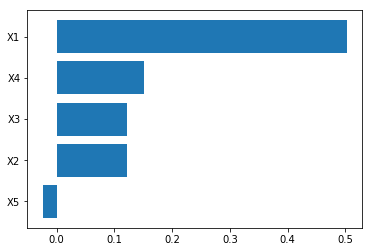

In [267]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

print(list(df.drop(['Y'], axis=1).columns))
svm = SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_[0], df.drop(['Y'], axis=1))

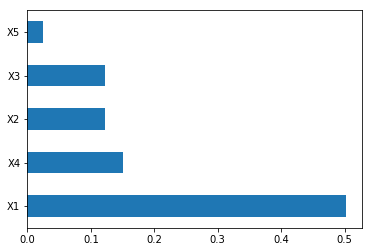

In [263]:
pd.Series(abs(svm.coef_[0]), index= df.drop(['Y'], axis=1).columns).nlargest(10).plot(kind='barh')

['X1' 'X2' 'X3' 'X4' 'X5']


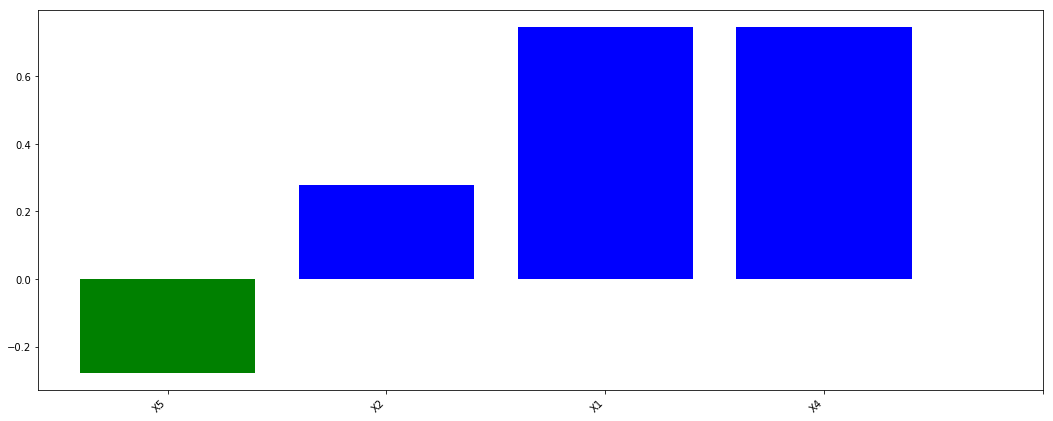

In [248]:
def feature_plot(classifier, feature_names, top_features=2):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()

print(df.drop(['Y'], axis = 1).columns.values)
X = StandardScaler().fit_transform(X)
trainedsvm = svm.LinearSVC().fit(X, Y)
feature_plot(trainedsvm, df.drop(['Y'], axis = 1).columns.values)

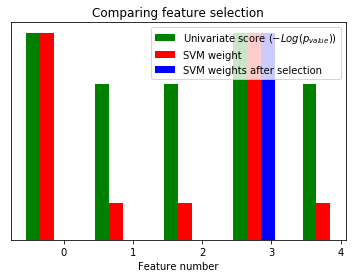

In [250]:
plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# Univariate feature selection with F-test for feature scoring
# Using the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, Y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

# Comparing to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), Y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()